In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
accepted = pd.read_csv('accepted_2007_to_2018Q4.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
accepted.shape

(11212, 151)

# Data Cleaning for Both "Accepted" dataset

In [ ]:
accepted.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,...,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,...,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,...,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,...,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,...,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
accepted.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [ ]:
accepted.info

<bound method DataFrame.info of              id  member_id  ...  settlement_percentage  settlement_term
0      68407277        NaN  ...                    NaN              NaN
1      68355089        NaN  ...                    NaN              NaN
2      68341763        NaN  ...                    NaN              NaN
3      66310712        NaN  ...                    NaN              NaN
4      68476807        NaN  ...                    NaN              NaN
...         ...        ...  ...                    ...              ...
11207  67666082        NaN  ...                    NaN              NaN
11208  67636085        NaN  ...                    NaN              NaN
11209  67695937        NaN  ...                    NaN              NaN
11210  67516066        NaN  ...                    NaN              NaN
11211  67666116        NaN  ...                    NaN              NaN

[11212 rows x 151 columns]>

In [ ]:
accepted.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,1.121200e+04,0.0,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,1.121200e+04,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,5810.000000,2010.000000,11212.000000,11212.000000,11212.000000,11207.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,11212.000000,3273.000000,11212.0,82.000000,82.000000,11211.000000,11211.000000,1.121100e+04,...,11211.000000,11211.000000,11211.000000,11211.000000,11211.000000,10612.000000,11211.000000,11211.000000,11211.000000,11211.000000,11098.000000,11211.000000,11211.000000,1.121100e+04,11211.000000,11211.000000,11211.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,92.000000,92.0,92.000000,72.000000,92.000000,92.000000,315.000000,315.000000,315.000000
mean,6.799199e+07,NaN,15073.184980,15073.184980,15069.044328,12.275101,439.801314,7.870799e+04,19.445148,0.340617,695.807617,699.807706,0.623350,34.122031,65.684080,12.304674,0.235730,17432.862736,50.974320,25.934534,962.102810,961.810054,15167.328159,15163.325928,12193.008408,2742.444843,2.062199,229.812686,40.798738,4355.852995,679.769443,664.202640,0.023279,44.684387,1.0,113449.228780,18.636585,0.004638,265.521363,1.457926e+05,...,9.005084,8.595665,14.973241,5.761752,12.250557,0.000377,0.002944,0.088931,2.338953,94.047355,43.619355,0.133351,0.069485,1.815265e+05,54806.072786,23309.023637,46810.037463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,137.623587,3.0,12.750000,431.456667,10941.286630,176.168370,4924.525810,47.098667,13.742857
std,1.975298e+06,NaN,8722.385701,8722.385701,8719.004062,4.286079,250.883389,6.599787e+04,12.770962,0.892000,31.501270,31.501694,0.902845,21.938428,23.650184,5.877979,0.646375,22089.082057,24.218709,12.285196,3003.916463,3002.875645,9815.649586,9812.112398,8419.064918,2788.301576,13.256528,983.408236,176.247195,6526.893175,79.082052,126.602465,0.160535,21.383655,0.0,57414.290233,6.860602,0.069250,2049.458982,1.567331e+05,...,7.657969,4.872213,8.449461,3.371612,5.855098,0.019412,0.055799,0.499093,1.977617,8.695424,36.180747,0.381980,0.460856,1.742288e+05,50589.618653,23275.931499,45958.451863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,122.728785,0.0,9.850113,361.553534,7019.716473,190.269528,3591.698042,5.107359,7.401190
min,3.617740e+05,NaN,1000.000000,1000.000000,1000.000000,5.320000,30.540000,1.770000e+03,0.000000,0.000000,660.000000,664.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

## Cleaning Dataset

In [ ]:
accepted.isnull().sum(axis=0)

id                           0
member_id                11212
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
                         ...  
settlement_status        10897
settlement_date          10897
settlement_amount        10897
settlement_percentage    10897
settlement_term          10897
Length: 151, dtype: int64

In [ ]:
accepted.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11212 entries, 0 to 11211
Data columns (total 151 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          11212 non-null  int64  
 1   member_id                                   0 non-null      float64
 2   loan_amnt                                   11212 non-null  float64
 3   funded_amnt                                 11212 non-null  float64
 4   funded_amnt_inv                             11212 non-null  float64
 5   term                                        11212 non-null  object 
 6   int_rate                                    11212 non-null  float64
 7   installment                                 11212 non-null  float64
 8   grade                                       11212 non-null  object 
 9   sub_grade                                   11212 non-null  object 
 10  emp_title

In [ ]:
accepted = accepted.drop(['member_id'], axis=1)

In [ ]:
missing = round(100*(accepted.isnull().sum()/len(accepted.id)), 2)
missing.loc[missing > 0]
#Percentage of missing values per column

emp_title                  5.58
emp_length                 5.51
desc                      99.99
title                      1.18
mths_since_last_delinq    48.18
                          ...  
settlement_status         97.19
settlement_date           97.19
settlement_amount         97.19
settlement_percentage     97.19
settlement_term           97.19
Length: 104, dtype: float64

In [ ]:
missing.sort_values(ascending=False)

sec_app_fico_range_low      100.0
sec_app_earliest_cr_line    100.0
sec_app_mort_acc            100.0
sec_app_open_acc            100.0
sec_app_revol_util          100.0
                            ...  
pub_rec                       0.0
open_acc                      0.0
inq_last_6mths                0.0
fico_range_high               0.0
id                            0.0
Length: 150, dtype: float64

In [ ]:
drop_columns = sorted(list(missing[missing > 30].index))
drop_columns

['annual_inc_joint',
 'debt_settlement_flag_date',
 'deferral_term',
 'desc',
 'dti_joint',
 'hardship_amount',
 'hardship_dpd',
 'hardship_end_date',
 'hardship_last_payment_amount',
 'hardship_length',
 'hardship_loan_status',
 'hardship_payoff_balance_amount',
 'hardship_reason',
 'hardship_start_date',
 'hardship_status',
 'hardship_type',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'next_pymnt_d',
 'orig_projected_additional_accrued_interest',
 'payment_plan_start_date',
 'revol_bal_joint',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_earliest_cr_line',
 'sec_app_fico_range_high',
 'sec_app_fico_range_low',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_mths_since_last_major_derog',
 'sec_app_num_rev_accts',
 'sec_app_open_acc',
 'sec_app_open_act_il',
 'sec_app_revol_util',
 'settlement_amount',
 'settlement_date',
 'settle

In [ ]:
len(drop_columns)

43

In [ ]:
accepted = accepted.drop(labels=drop_columns,axis=1)

In [ ]:
accepted.shape

(11212, 107)

In [ ]:
accepted.isnull().sum()

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
                             ..
total_bc_limit                1
total_il_high_credit_limit    1
hardship_flag                 1
disbursement_method           1
debt_settlement_flag          1
Length: 107, dtype: int64

In [ ]:
accepted['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)'], dtype=object)

In [ ]:
accepted['loan_status'].value_counts(dropna=False)

Fully Paid            8039
Charged Off           1941
Current               1147
Late (31-120 days)      65
In Grace Period         16
Late (16-30 days)        4
Name: loan_status, dtype: int64

In [ ]:
accepted = accepted.loc[accepted['loan_status'].isin(['Fully Paid','Charged Off'])]
accepted['loan_status'].value_counts(dropna=False)

Fully Paid     8039
Charged Off    1941
Name: loan_status, dtype: int64

In [ ]:
accepted_clean = accepted
accepted_clean.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,...,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,...,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,...,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.0,0.0,22705.924294,22705.92,20000.0,2705.92,...,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,...,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N
5,68426831,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,300xx,GA,10.20,0.0,Oct-1987,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,w,0.0,0.0,13708.948530,13708.95,11950.0,1758.95,...,0.0,0.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,NaN,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,Cash,N


# "Accepted" data analysis

In [ ]:
#We know that there are 2 loan status:
accepted_clean['loan_status'].value_counts(dropna=False)

Fully Paid     8039
Charged Off    1941
Name: loan_status, dtype: int64

## Creating a Pie Chart for Loan status

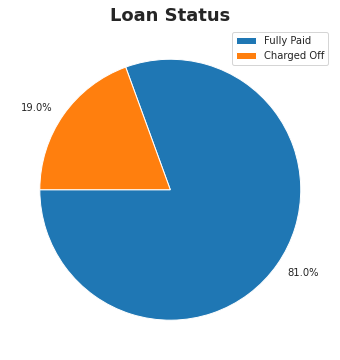

In [ ]:
# Converting number of values in loan_status column to percentages:
total = accepted_clean['loan_status'].value_counts(dropna=False).sum()
status = [accepted_clean['loan_status'].value_counts(dropna=False)[0], accepted_clean['loan_status'].value_counts(dropna=False)[1]]
fully_paid_percent = round((status[0]*100)/total,0)
charge_off_percent = round((status[1]*100)/total,0)
percent = [str(fully_paid_percent)+"%",str(charge_off_percent)+"%"]
# Creating Pie Chart for loan_status column:
plt.figure(figsize=(12,6))
plt.title('Loan Status', fontsize=18, fontweight='bold')
plt.pie(accepted_clean['loan_status'].value_counts(dropna=False),labels=percent, startangle=180)
plt.legend(['Fully Paid', 'Charged Off'], loc='best')

## Barplot for loan Status

Text(0.5, 0, 'Count')

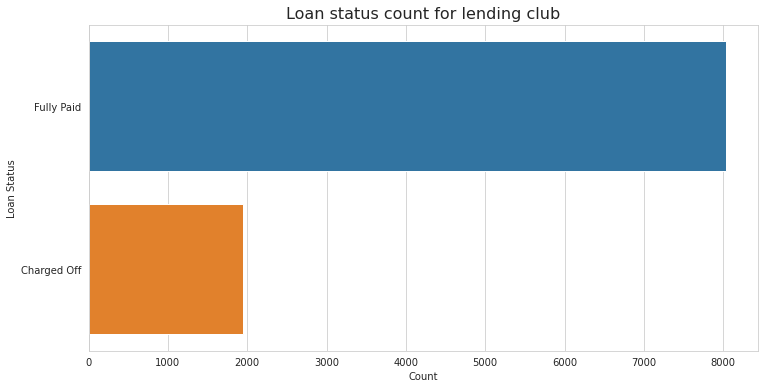

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y=accepted_clean['loan_status'].value_counts(dropna=False).index, x=accepted_clean['loan_status'].value_counts(dropna=False))
plt.title("Loan status count for lending club", fontsize=16)
plt.ylabel('Loan Status')
plt.xlabel('Count')

## Barplot for the loan status w.r.t loan amounts

In [ ]:
accepted_clean.loan_amnt

0         3600.0
1        24700.0
2        20000.0
4        10400.0
5        11950.0
          ...   
11206    13100.0
11208    16800.0
11209     8000.0
11210    22000.0
11211    20000.0
Name: loan_amnt, Length: 9980, dtype: float64

In [ ]:
#Categorizing them according to charged off and Fully Paid:
categorized_loan_amnt = accepted_clean.groupby('loan_status')['loan_amnt'].sum()
categorized_loan_amnt.sum()/(1e6)

143.990025

In [ ]:
#Converting values to millions of dollars:
categorized_loan_amnt_str=[]
categorized_loan_amnt_str_0 = "$"+str(round(categorized_loan_amnt[0]/(1e6),2))+"m"
categorized_loan_amnt_str_1 = "$"+str(round(categorized_loan_amnt[1]/(1e6),2))+"m"
categorized_loan_amnt_str = [categorized_loan_amnt_str_0, categorized_loan_amnt_str_1]
categorized_loan_amnt_str

['$30.73m', '$113.26m']

Text(0, 0.5, 'Count in dollars')

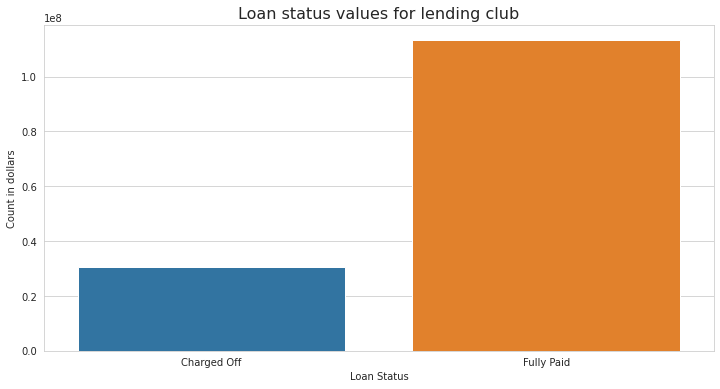

In [ ]:
#Bulding Barplot For status as per amount:
plt.figure(figsize=(12,6))
sns.barplot(x=categorized_loan_amnt.index, y=categorized_loan_amnt)
plt.title("Loan status values for lending club", fontsize=16)
plt.xlabel('Loan Status')
plt.ylabel('Count in dollars')

## Pie Chart for for the same in millions of dollars

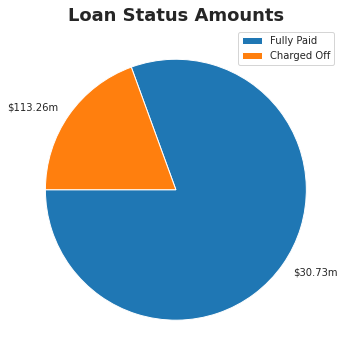

In [ ]:
#Pie chart for value in =billions of dollars
plt.figure(figsize=(12,6))
plt.title('Loan Status Amounts', fontsize=18, fontweight='bold')
plt.pie(accepted_clean['loan_status'].value_counts(dropna=False),labels=categorized_loan_amnt_str, startangle=180)
plt.legend(['Fully Paid', 'Charged Off'], loc='best')

In [ ]:
accepted_clean[['int_rate','installment']]

,int_rate,installment
0,13.99,123.03
1,11.99,820.28
2,10.78,432.66
4,22.45,289.91
5,13.44,405.18
...,...,...
11206,18.20,474.92
11208,7.89,525.60
11209,9.76,257.24
11210,9.17,458.51


In [ ]:
accepted_clean.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title',
       ...
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'hardship_flag', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object', length=107)

In [ ]:
accepted_clean[['funded_amnt_inv','term']]

,funded_amnt_inv,term
0,3600.0,36 months
1,24700.0,36 months
2,20000.0,60 months
4,10400.0,60 months
5,11950.0,36 months
...,...,...
11206,13100.0,36 months
11208,16800.0,36 months
11209,8000.0,36 months
11210,22000.0,60 months


In [ ]:
funded_amnt = accepted_clean['funded_amnt_inv']
term = accepted_clean['term']

## Plots on different terms and the amount funded

In [ ]:
term_1 = term.unique()

Text(0.5, 1.0, 'Plot of Funded amount w.r.t Categorized months(terms)')

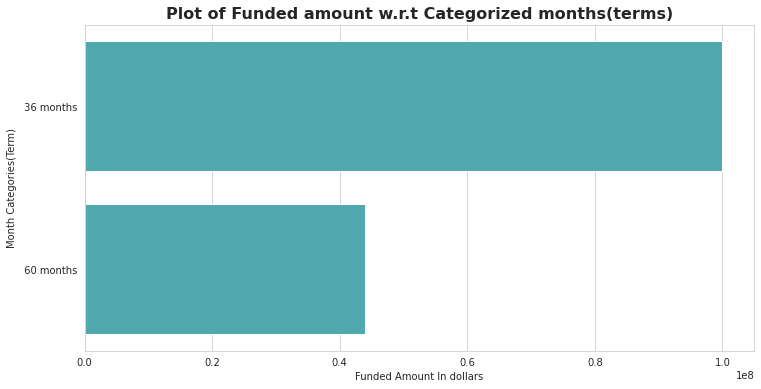

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y=term_1, x=accepted_clean.groupby('term').sum()['funded_amnt_inv'], color='#42b7bd')
plt.xlabel('Funded Amount In dollars')
plt.ylabel('Month Categories(Term)')
plt.title('Plot of Funded amount w.r.t Categorized months(terms)', fontsize=16, fontweight='bold')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Loan Status')

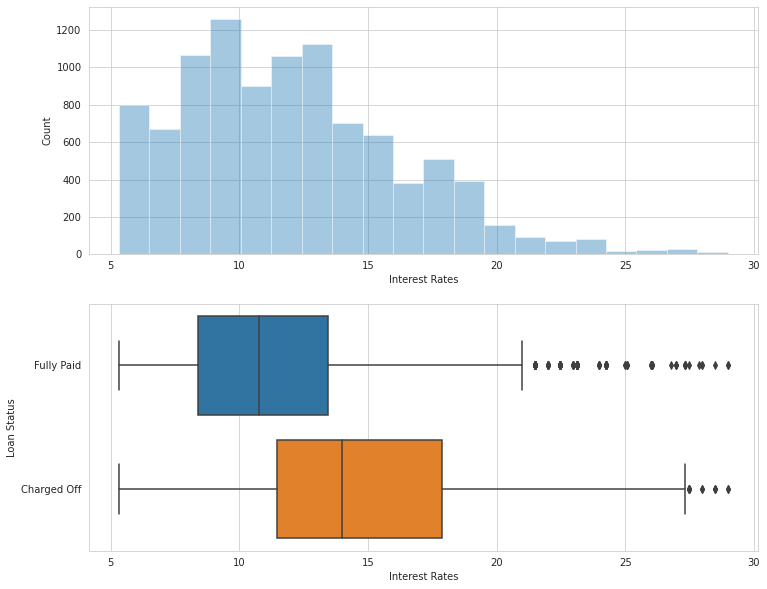

In [ ]:
fig,[ax1,ax2] = plt.subplots(ncols=1, nrows=2, figsize=(12,10))
sns.distplot(ax=ax1, a=accepted_clean['int_rate'], bins=20, kde=False)
ax1.set_xlabel('Interest Rates')
ax1.set_ylabel('Count')
sns.boxplot(ax=ax2, x=accepted_clean['int_rate'], y=accepted_clean['loan_status'])
ax2.set_xlabel('Interest Rates')
ax2.set_ylabel('Loan Status')

## Box And Bar plot of installment v/s Grade

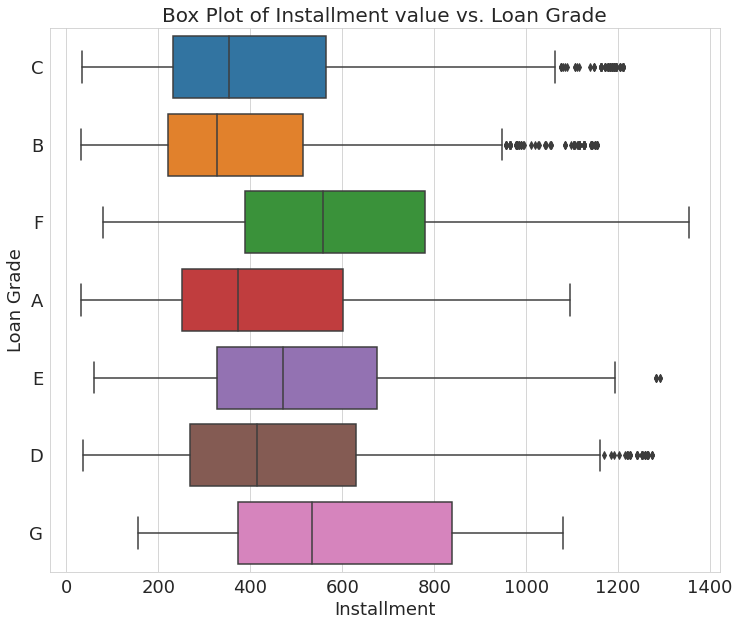

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(x="installment", y="grade", data=accepted_clean)
plt.title('Box Plot of Installment value vs. Loan Grade', fontsize=20)
plt.xlabel('Installment', fontsize=18)
plt.ylabel('Loan Grade', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [ ]:
gr = accepted_clean['grade'].value_counts(dropna=False)

Text(0.5, 0, 'Count')

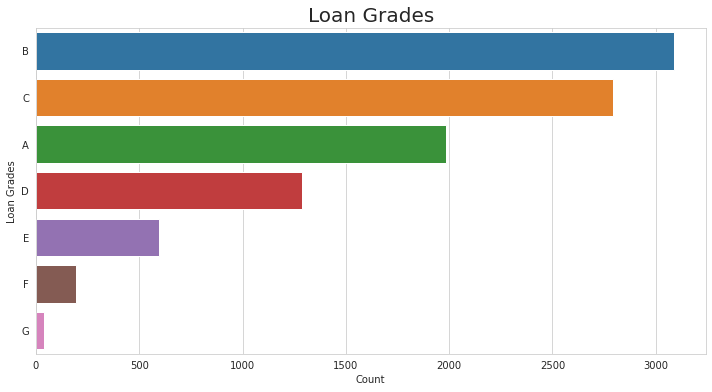

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=gr,y=gr.index)
plt.title('Loan Grades', fontsize=20)
plt.ylabel('Loan Grades', fontsize=10)
plt.xlabel('Count', fontsize=10)